<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign10_AssClustersV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Associação de Clusters

### Importando as bibliotecas

In [ ]:
!pip install pyfpgrowth

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import association_rules
import itertools
import warnings
import pyfpgrowth

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Cluter 01 na base Tédio - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster01_tedio_estresse/dadosTedioB_cluster1.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196
1,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284
2,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262
3,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635
4,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826
5,0.024871,0.045830,0.008720,0.153731,0.235671,0.183499
6,0.042983,0.077609,0.011438,0.175638,0.128352,0.108902
7,0.037752,0.062227,0.010248,0.155643,0.159876,0.125097


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.03479982, 0.05718747, 0.01091015, 0.12549546, 0.19198831,
        0.13119609],
       [0.04092193, 0.06597964, 0.00934601, 0.1235335 , 0.11703547,
        0.1362838 ],
       [0.02951298, 0.05004201, 0.00948046, 0.12086825, 0.19413033,
        0.18526204],
       ...,
       [0.43974007, 0.6773404 , 0.03127823, 0.08544805, 0.00248411,
        0.00528486],
       [0.22045008, 0.46955588, 0.02042898, 0.09037666, 0.00441339,
        0.01749024],
       [0.49184734, 0.68961991, 0.02856505, 0.08411918, 0.00161628,
        0.00458242]])

In [ ]:
matrix.T

array([[0.03479982, 0.04092193, 0.02951298, ..., 0.43974007, 0.22045008,
        0.49184734],
       [0.05718747, 0.06597964, 0.05004201, ..., 0.6773404 , 0.46955588,
        0.68961991],
       [0.01091015, 0.00934601, 0.00948046, ..., 0.03127823, 0.02042898,
        0.02856505],
       [0.12549546, 0.1235335 , 0.12086825, ..., 0.08544805, 0.09037666,
        0.08411918],
       [0.19198831, 0.11703547, 0.19413033, ..., 0.00248411, 0.00441339,
        0.00161628],
       [0.13119609, 0.1362838 , 0.18526204, ..., 0.00528486, 0.01749024,
        0.00458242]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,-0.000209,0.000341,-0.001301,0.000022,0.001023,-0.000107
1,-0.000139,0.000221,-0.000716,0.000101,0.000450,0.000080
2,-0.000091,0.000175,-0.001172,-0.000028,0.000916,0.000102
3,-0.000341,0.000437,-0.001105,0.000201,0.000695,-0.000101
4,-0.000222,0.000334,-0.001053,0.000098,0.000736,-0.000038
...,...,...,...,...,...,...
5427,-0.002450,0.003551,-0.000513,0.000073,0.000504,-0.000886
5428,-0.001750,0.002997,-0.000344,0.000030,0.000417,-0.000799
5429,-0.001974,0.003317,-0.000527,0.000022,0.000524,-0.000887
5430,-0.002627,0.003339,-0.000506,0.000150,0.000413,-0.000763


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

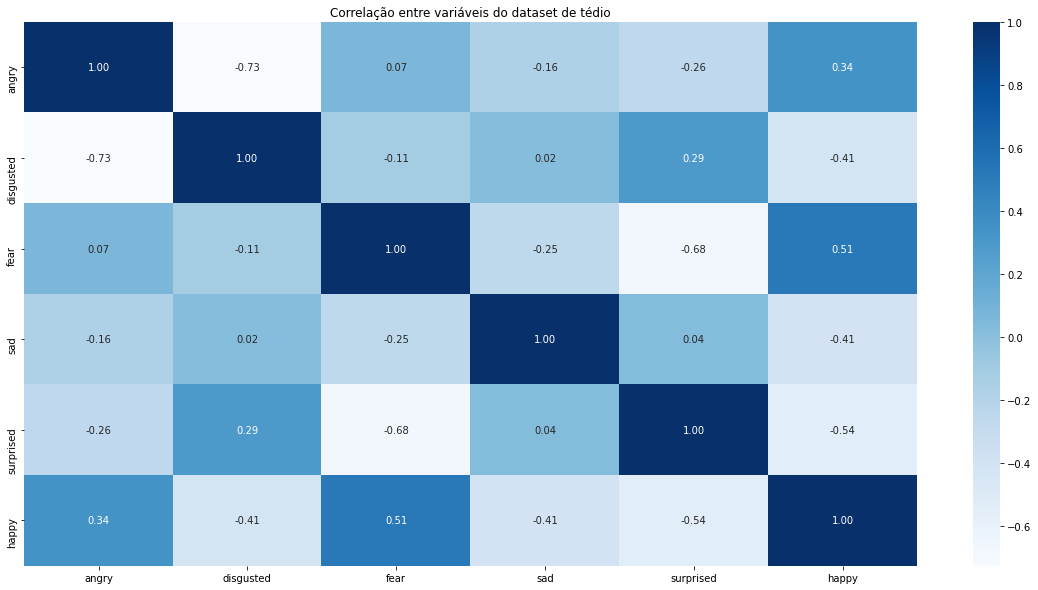

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        3299.0
disgusted    2682.0
fear         2964.0
sad          2935.0
surprised    2416.0
happy        2700.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

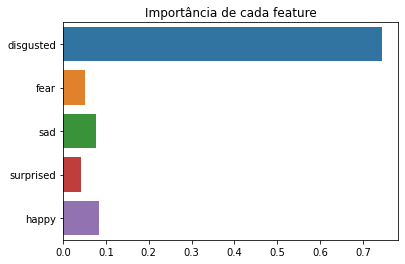

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

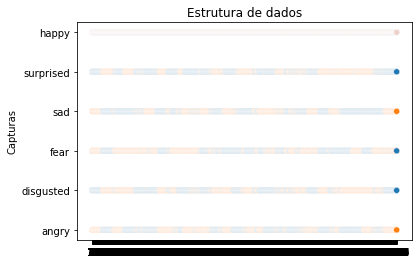

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7f19cc52ae50>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.607327,(angry)


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.607327,(angry),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(d, s)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.607327,(angry)
1,0.493741,(disgusted)
2,0.545655,(fear)
3,0.540317,(sad)
4,0.444772,(surprised)
5,0.497054,(happy)
6,0.347938,"(fear, angry)"
7,0.288660,"(sad, angry)"
8,0.207658,"(angry, surprised)"
9,0.385677,"(happy, angry)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fear),(angry),0.545655,0.607327,0.347938,0.637652,1.049932,0.016547,1.083690
1,(happy),(angry),0.497054,0.607327,0.385677,0.775926,1.277608,0.083803,1.752425
2,(angry),(happy),0.607327,0.497054,0.385677,0.635041,1.277608,0.083803,1.378087
3,(surprised),(disgusted),0.444772,0.493741,0.292526,0.657699,1.332073,0.072924,1.478987
4,(happy),(fear),0.497054,0.545655,0.399300,0.803333,1.472236,0.128080,2.310227
5,(fear),(happy),0.545655,0.497054,0.399300,0.731781,1.472236,0.128080,1.875133
6,"(happy, fear)",(angry),0.399300,0.607327,0.301546,0.755187,1.243460,0.059040,1.603970
7,"(happy, angry)",(fear),0.385677,0.545655,0.301546,0.781862,1.432885,0.091099,2.082827
8,"(fear, angry)",(happy),0.347938,0.497054,0.301546,0.866667,1.743605,0.128602,3.772091
9,(happy),"(fear, angry)",0.497054,0.347938,0.301546,0.606667,1.743605,0.128602,1.657784


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 01 na base Estresse - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster01_tedio_estresse/dadosEstresseB_cluster1.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.100790,0.192510,0.020056,0.143483,0.035893,0.036650
1,0.117206,0.294099,0.019053,0.091390,0.008923,0.050300
2,0.099648,0.265178,0.022462,0.098231,0.013674,0.051873
3,0.125407,0.308587,0.020549,0.103317,0.009624,0.041843
4,0.112386,0.299351,0.021350,0.106606,0.010373,0.046205
5,0.116339,0.314887,0.024295,0.125171,0.010312,0.040529
6,0.102454,0.272277,0.020551,0.090256,0.013013,0.054382
7,0.146948,0.356513,0.023564,0.106481,0.009985,0.031880


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.10078987, 0.19251033, 0.0200556 , 0.14348253, 0.03589262,
        0.03664977],
       [0.1172055 , 0.29409895, 0.01905349, 0.0913896 , 0.00892257,
        0.05029965],
       [0.09964848, 0.2651785 , 0.02246176, 0.09823121, 0.01367393,
        0.0518735 ],
       ...,
       [0.53008764, 0.67530605, 0.056671  , 0.05782263, 0.00271792,
        0.00238438],
       [0.37310886, 0.57899467, 0.03669536, 0.08818419, 0.00308916,
        0.00567172],
       [0.20214641, 0.40930156, 0.02098143, 0.08241433, 0.00453114,
        0.01514299]])

In [ ]:
matrix.T

array([[0.10078987, 0.1172055 , 0.09964848, ..., 0.53008764, 0.37310886,
        0.20214641],
       [0.19251033, 0.29409895, 0.2651785 , ..., 0.67530605, 0.57899467,
        0.40930156],
       [0.0200556 , 0.01905349, 0.02246176, ..., 0.056671  , 0.03669536,
        0.02098143],
       [0.14348253, 0.0913896 , 0.09823121, ..., 0.05782263, 0.08818419,
        0.08241433],
       [0.03589262, 0.00892257, 0.01367393, ..., 0.00271792, 0.00308916,
        0.00453114],
       [0.03664977, 0.05029965, 0.0518735 , ..., 0.00238438, 0.00567172,
        0.01514299]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,-0.000235,0.000678,-0.000482,0.000250,0.000238,-0.000315
1,-0.000531,0.001148,-0.000406,0.000126,0.000252,-0.000401
2,-0.000519,0.001047,-0.000297,0.000134,0.000214,-0.000357
3,-0.000554,0.001217,-0.000459,0.000155,0.000277,-0.000452
4,-0.000595,0.001208,-0.000424,0.000163,0.000257,-0.000434
...,...,...,...,...,...,...
5336,0.000634,0.001641,-0.000546,-0.000144,0.000641,-0.000899
5337,0.000763,0.001557,-0.000501,-0.000174,0.000632,-0.000878
5338,0.000419,0.001657,-0.000235,-0.000177,0.000573,-0.000851
5339,-0.000176,0.001802,-0.000635,0.000015,0.000572,-0.000841


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

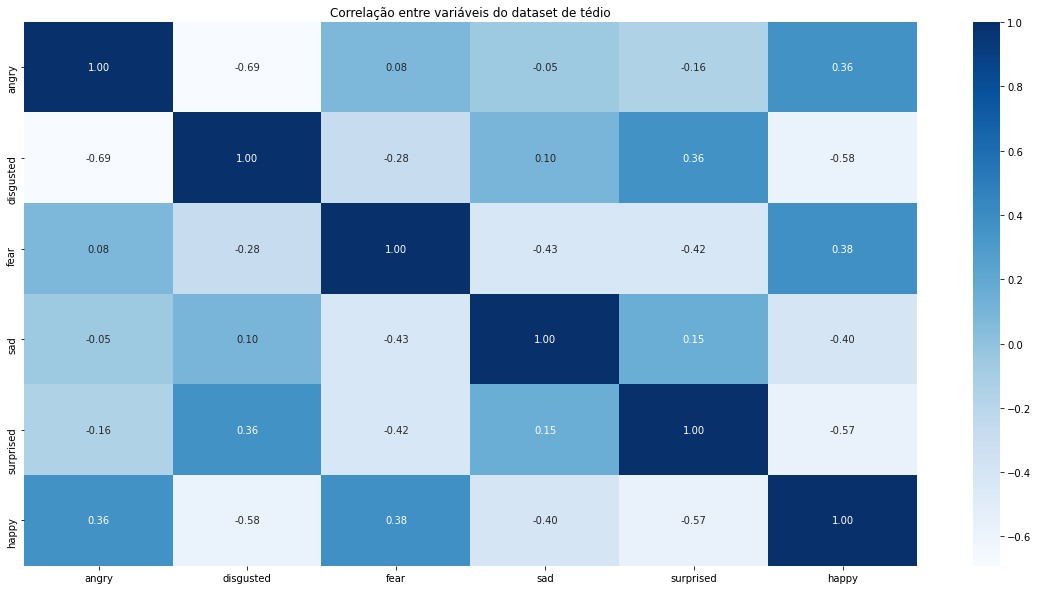

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        3063.0
disgusted    2681.0
fear         2438.0
sad          2801.0
surprised    2705.0
happy        2763.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

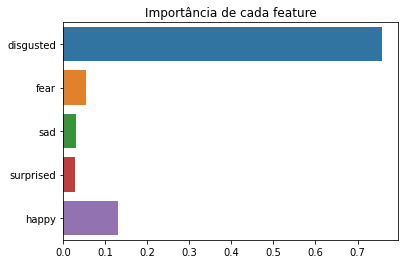

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

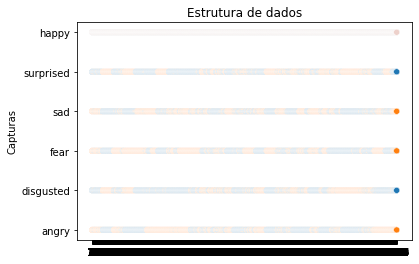

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7f19bbc98b50>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(d, s)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.573488,(angry)
1,0.501966,(disgusted)
2,0.456469,(fear)
3,0.524434,(sad)
4,0.506459,(surprised)
5,0.517319,(happy)
6,0.281408,"(fear, angry)"
7,0.287587,"(sad, angry)"
8,0.252013,"(angry, surprised)"
9,0.386257,"(happy, angry)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fear),(angry),0.456469,0.573488,0.281408,0.616489,1.074981,0.019629,1.112124
1,(happy),(angry),0.517319,0.573488,0.386257,0.746652,1.301949,0.089581,1.683503
2,(angry),(happy),0.573488,0.517319,0.386257,0.673523,1.301949,0.089581,1.478452
3,(surprised),(disgusted),0.506459,0.501966,0.344879,0.680961,1.356588,0.090654,1.561045
4,(disgusted),(surprised),0.501966,0.506459,0.344879,0.687057,1.356588,0.090654,1.577094
5,(happy),(fear),0.517319,0.456469,0.329714,0.637351,1.396263,0.093574,1.498779
6,(fear),(happy),0.456469,0.517319,0.329714,0.722313,1.396263,0.093574,1.738223
7,(surprised),(sad),0.506459,0.524434,0.304250,0.600739,1.145501,0.038646,1.191118
8,"(happy, fear)",(angry),0.329714,0.573488,0.261562,0.793299,1.383288,0.072475,2.063427
9,"(happy, angry)",(fear),0.386257,0.456469,0.261562,0.677169,1.483495,0.085247,1.683641


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 02 na base Tédio - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster02_tedio_estresse/dadosTedioB_cluster2.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.327498,0.392613,0.016025,0.017045,0.005256,0.060015
1,0.198708,0.252032,0.016968,0.024735,0.011413,0.110013
2,0.337045,0.393520,0.014208,0.017908,0.005155,0.066353
3,0.251949,0.265852,0.032992,0.036722,0.014854,0.044547
4,0.020631,0.034659,0.035141,0.233966,0.208559,0.355991
5,0.303590,0.372067,0.016775,0.015954,0.005431,0.067621
6,0.050196,0.076627,0.021997,0.073915,0.051553,0.267576
7,0.326512,0.389500,0.014358,0.018805,0.005033,0.070127


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.32749798, 0.39261324, 0.0160254 , 0.01704456, 0.00525608,
        0.06001475],
       [0.19870753, 0.25203216, 0.01696817, 0.02473539, 0.01141343,
        0.11001288],
       [0.33704482, 0.39352042, 0.01420813, 0.01790822, 0.00515483,
        0.06635289],
       ...,
       [0.01823204, 0.01707767, 0.02488454, 0.16444767, 0.34142901,
        0.57356838],
       [0.30029398, 0.36417538, 0.0142766 , 0.02004244, 0.00575526,
        0.07769288],
       [0.2645119 , 0.29937201, 0.01660436, 0.02371787, 0.00839814,
        0.08029991]])

In [ ]:
matrix.T

array([[0.32749798, 0.19870753, 0.33704482, ..., 0.01823204, 0.30029398,
        0.2645119 ],
       [0.39261324, 0.25203216, 0.39352042, ..., 0.01707767, 0.36417538,
        0.29937201],
       [0.0160254 , 0.01696817, 0.01420813, ..., 0.02488454, 0.0142766 ,
        0.01660436],
       [0.01704456, 0.02473539, 0.01790822, ..., 0.16444767, 0.02004244,
        0.02371787],
       [0.00525608, 0.01141343, 0.00515483, ..., 0.34142901, 0.00575526,
        0.00839814],
       [0.06001475, 0.11001288, 0.06635289, ..., 0.57356838, 0.07769288,
        0.08029991]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,-0.139961,0.155623,-0.068481,-0.001479,0.028074,-0.019336
1,-0.427320,0.374340,0.109864,-0.010142,-0.001050,-0.003357
2,0.187719,-0.120973,-0.111420,0.003588,0.014469,-0.006721
3,1.000612,-0.848260,0.456461,0.023834,-0.118054,0.026501
4,-0.186943,0.142729,0.044954,0.162084,-0.084452,0.014531
...,...,...,...,...,...,...
184,-0.060344,0.086407,-0.087229,-0.001777,0.022349,-0.011413
185,0.647814,-0.523143,-0.021065,0.005889,-0.028667,0.018165
186,0.267213,-0.222607,-0.445550,-0.150739,0.126058,0.093090
187,-0.228871,0.227449,-0.077893,0.000393,0.026167,-0.015729


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

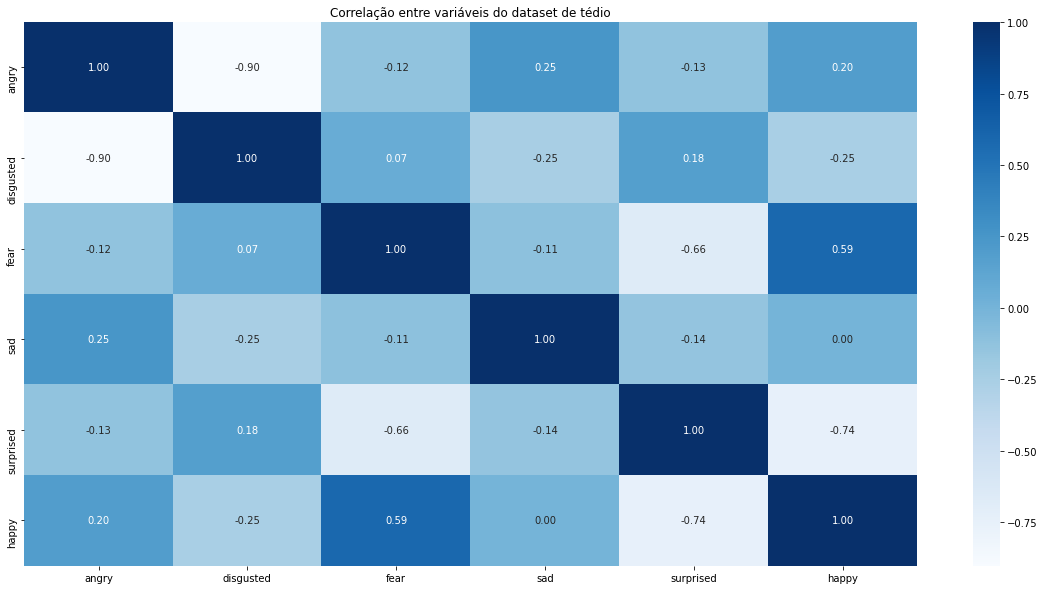

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry         82.0
disgusted    110.0
fear          94.0
sad           97.0
surprised     99.0
happy        101.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

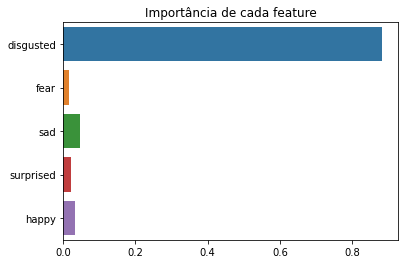

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

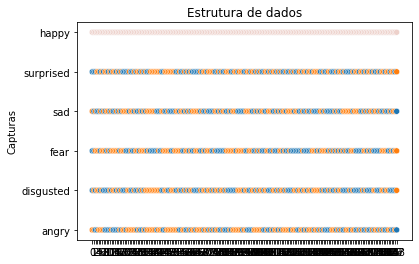

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7f19ba3394d0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(d, s)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.433862,(angry)
1,0.582011,(disgusted)
2,0.497354,(fear)
3,0.513228,(sad)
4,0.523810,(surprised)
5,0.534392,(happy)
6,0.285714,"(sad, angry)"
7,0.280423,"(happy, angry)"
8,0.306878,"(fear, disgusted)"
9,0.238095,"(sad, disgusted)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(angry),(sad),0.433862,0.513228,0.285714,0.658537,1.283128,0.063044,1.425548
1,(angry),(happy),0.433862,0.534392,0.280423,0.646341,1.209490,0.048571,1.316548
2,(fear),(disgusted),0.497354,0.582011,0.306878,0.617021,1.060155,0.017413,1.091417
3,(surprised),(disgusted),0.523810,0.582011,0.349206,0.666667,1.145455,0.044344,1.253968
4,(disgusted),(surprised),0.582011,0.523810,0.349206,0.600000,1.145455,0.044344,1.190476
5,(happy),(fear),0.534392,0.497354,0.412698,0.772277,1.552770,0.146916,2.207269
6,(fear),(happy),0.497354,0.534392,0.412698,0.829787,1.552770,0.146916,2.735450
7,"(happy, disgusted)",(fear),0.248677,0.497354,0.222222,0.893617,1.796741,0.098541,4.724868
8,"(fear, disgusted)",(happy),0.306878,0.534392,0.222222,0.724138,1.355070,0.058229,1.687831
9,"(sad, fear)",(happy),0.227513,0.534392,0.216931,0.953488,1.784251,0.095350,10.010582


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 02 na base Estresse - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster02_tedio_estresse/dadosEstresseB_cluster2.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.260695,0.295382,0.016432,0.019624,0.009795,0.089554
1,0.063959,0.089680,0.018131,0.068318,0.041687,0.243902
2,0.335039,0.397189,0.013829,0.017137,0.004795,0.069709
3,0.301944,0.344066,0.015182,0.019437,0.007365,0.075052
4,0.317403,0.386264,0.014405,0.018455,0.005293,0.072923
5,0.291049,0.327095,0.015850,0.021888,0.007734,0.070485
6,0.156700,0.202946,0.018097,0.030338,0.015276,0.124704
7,0.339571,0.399130,0.014910,0.016623,0.004956,0.066619


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.26069486, 0.29538165, 0.01643177, 0.01962392, 0.00979518,
        0.08955424],
       [0.06395932, 0.08968049, 0.01813064, 0.06831781, 0.0416873 ,
        0.24390239],
       [0.3350391 , 0.39718942, 0.01382887, 0.01713702, 0.00479511,
        0.06970858],
       ...,
       [0.02902993, 0.01104766, 0.04021345, 0.16966216, 0.51519702,
        0.28031752],
       [0.24941277, 0.31227304, 0.01551227, 0.02015965, 0.0080531 ,
        0.09459227],
       [0.26813176, 0.31167282, 0.01496371, 0.0213712 , 0.00785406,
        0.08118625]])

In [ ]:
matrix.T

array([[0.26069486, 0.06395932, 0.3350391 , ..., 0.02902993, 0.24941277,
        0.26813176],
       [0.29538165, 0.08968049, 0.39718942, ..., 0.01104766, 0.31227304,
        0.31167282],
       [0.01643177, 0.01813064, 0.01382887, ..., 0.04021345, 0.01551227,
        0.01496371],
       [0.01962392, 0.06831781, 0.01713702, ..., 0.16966216, 0.02015965,
        0.0213712 ],
       [0.00979518, 0.0416873 , 0.00479511, ..., 0.51519702, 0.0080531 ,
        0.00785406],
       [0.08955424, 0.24390239, 0.06970858, ..., 0.28031752, 0.09459227,
        0.08118625]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,0.373362,-0.296893,0.028363,0.001402,-0.022963,0.010746
1,-0.271741,0.209407,0.337872,0.006607,-0.062545,0.038479
2,-0.034964,0.074795,-0.271383,0.003345,0.033402,-0.007682
3,0.369889,-0.281470,-0.133264,0.014969,-0.008199,0.004117
4,-0.320240,0.313024,-0.187848,-0.004870,0.041130,-0.014216
...,...,...,...,...,...,...
178,-0.167287,0.125541,0.838382,0.390278,-0.045083,-0.193877
179,-0.133372,0.100230,0.777950,0.318377,-0.001846,-0.181455
180,0.035952,0.016999,-0.831855,-0.468851,0.504778,0.040762
181,-0.490170,0.439712,0.036103,-0.023601,0.027631,-0.008815


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

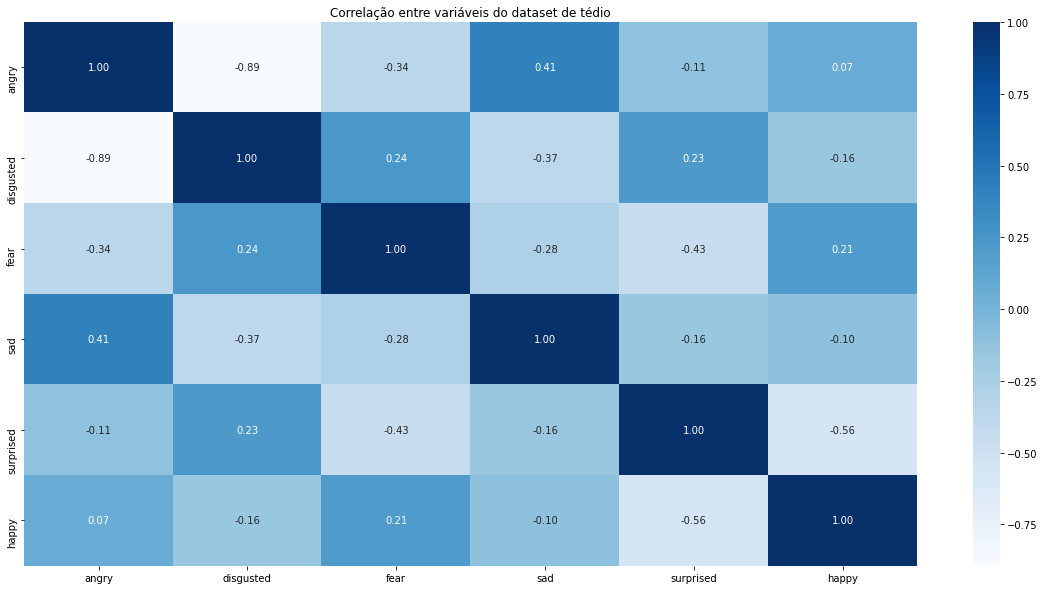

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry         91.0
disgusted    100.0
fear          88.0
sad           89.0
surprised     91.0
happy         88.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

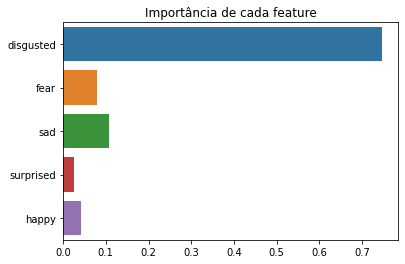

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

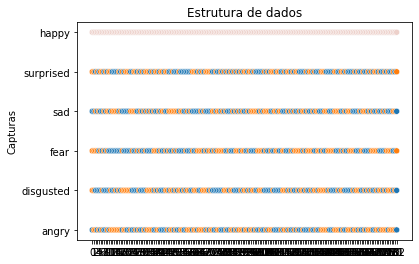

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7f19ccfd72d0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(d, s)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.497268,(angry)
1,0.546448,(disgusted)
2,0.480874,(fear)
3,0.486339,(sad)
4,0.497268,(surprised)
5,0.480874,(happy)
6,0.344262,"(sad, angry)"
7,0.218579,"(angry, surprised)"
8,0.256831,"(happy, angry)"
9,0.322404,"(fear, disgusted)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sad),(angry),0.486339,0.497268,0.344262,0.707865,1.423509,0.102422,1.720891
1,(angry),(sad),0.497268,0.486339,0.344262,0.692308,1.423509,0.102422,1.669399
2,(fear),(disgusted),0.480874,0.546448,0.322404,0.670455,1.226932,0.059632,1.376295
3,(surprised),(disgusted),0.497268,0.546448,0.327869,0.659341,1.206593,0.056138,1.331394


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 03 na base Tédio - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster03_tedio_estresse/dadosTedioB_cluster3.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.374793,0.085033,0.056185,0.117527,0.085709,0.002529
1,0.353724,0.079062,0.078747,0.061946,0.073181,0.002729
2,0.310167,0.058493,0.064721,0.064186,0.088994,0.004446
3,0.416074,0.095425,0.073513,0.069531,0.064713,0.002065
4,0.392648,0.095412,0.085009,0.092014,0.085426,0.001952
5,0.325398,0.097616,0.066540,0.044201,0.044722,0.005920
6,0.311398,0.056676,0.054184,0.069872,0.100298,0.005132
7,0.215372,0.026856,0.049042,0.056361,0.189628,0.008020


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.37479284, 0.08503307, 0.05618514, 0.11752748, 0.08570878,
        0.00252877],
       [0.35372416, 0.07906206, 0.07874663, 0.06194553, 0.07318071,
        0.00272857],
       [0.31016701, 0.05849268, 0.06472145, 0.06418597, 0.08899438,
        0.00444638],
       ...,
       [0.24535727, 0.23508517, 0.05175123, 0.25132375, 0.00895713,
        0.0039458 ],
       [0.1994085 , 0.20738956, 0.04370117, 0.20706433, 0.00995026,
        0.00630355],
       [0.20589098, 0.24124562, 0.05053854, 0.22789427, 0.00759592,
        0.00602798]])

In [ ]:
matrix.T

array([[0.37479284, 0.35372416, 0.31016701, ..., 0.24535727, 0.1994085 ,
        0.20589098],
       [0.08503307, 0.07906206, 0.05849268, ..., 0.23508517, 0.20738956,
        0.24124562],
       [0.05618514, 0.07874663, 0.06472145, ..., 0.05175123, 0.04370117,
        0.05053854],
       [0.11752748, 0.06194553, 0.06418597, ..., 0.25132375, 0.20706433,
        0.22789427],
       [0.08570878, 0.07318071, 0.08899438, ..., 0.00895713, 0.00995026,
        0.00759592],
       [0.00252877, 0.00272857, 0.00444638, ..., 0.0039458 , 0.00630355,
        0.00602798]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,0.012305,-0.010071,-0.002413,-0.000424,0.000679,0.000282
1,0.011244,-0.009519,0.001379,-0.000895,0.000138,0.000595
2,0.010363,-0.008720,0.000013,-0.000834,0.000694,0.000324
3,0.013519,-0.011277,-0.000343,-0.000893,0.000122,0.000775
4,0.012176,-0.010194,0.001073,-0.000789,0.000227,0.000500
...,...,...,...,...,...,...
2812,0.000939,0.000936,0.000852,0.002166,-0.001372,-0.000845
2813,-0.000144,0.001650,0.002116,0.001968,-0.001417,-0.000792
2814,0.000351,0.001288,0.001615,0.001641,-0.001117,-0.000728
2815,-0.000378,0.001782,0.001536,0.001338,-0.000835,-0.000690


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

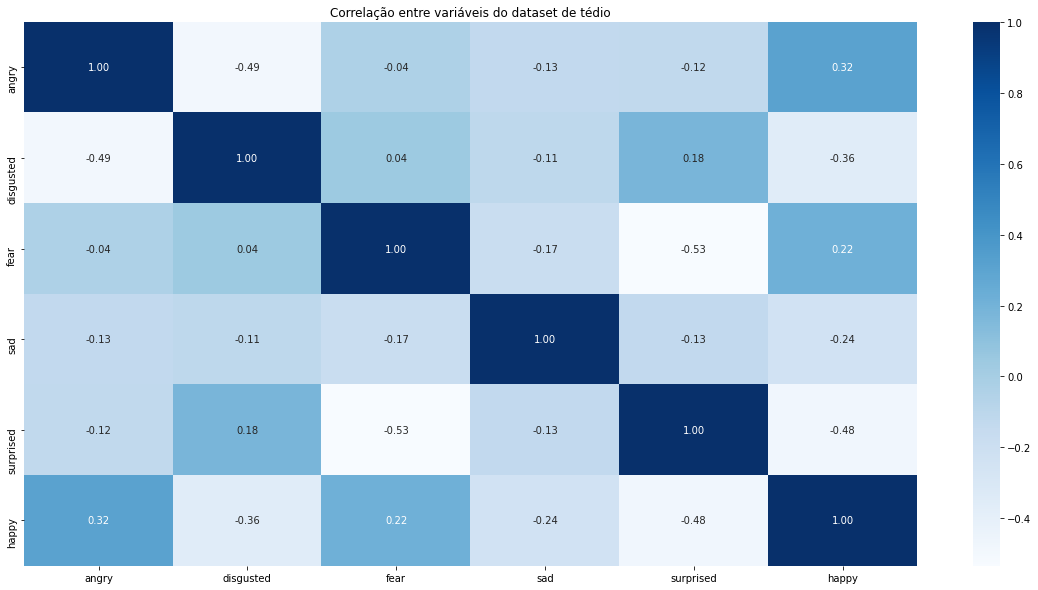

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        1764.0
disgusted    1456.0
fear         1408.0
sad          1283.0
surprised    1402.0
happy        1427.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

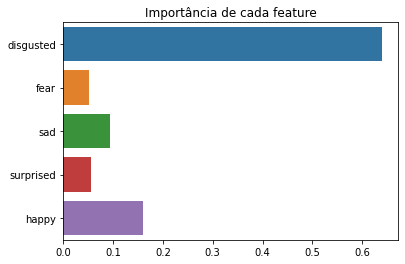

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

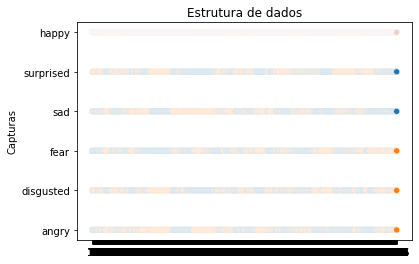

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7f19ba339650>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.626198,(angry)


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.626198,(angry),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(d, s)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.626198,(angry)
1,0.516862,(disgusted)
2,0.499823,(fear)
3,0.455449,(sad)
4,0.497693,(surprised)
5,0.506567,(happy)
6,0.204473,"(angry, disgusted)"
7,0.304224,"(fear, angry)"
8,0.253461,"(sad, angry)"
9,0.281505,"(angry, surprised)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fear),(angry),0.499823,0.626198,0.304224,0.608665,0.972000,-0.008764,0.955196
1,(happy),(angry),0.506567,0.626198,0.393681,0.777155,1.241069,0.076470,1.677407
2,(angry),(happy),0.626198,0.506567,0.393681,0.628685,1.241069,0.076470,1.328878
3,(surprised),(disgusted),0.497693,0.516862,0.302804,0.608417,1.177136,0.045566,1.233806
4,(happy),(fear),0.506567,0.499823,0.307774,0.607568,1.215568,0.054581,1.274559
5,(fear),(happy),0.499823,0.506567,0.307774,0.615767,1.215568,0.054581,1.284202
6,"(happy, fear)",(angry),0.307774,0.626198,0.220802,0.717416,1.145670,0.028075,1.322801
7,"(fear, angry)",(happy),0.304224,0.506567,0.220802,0.725788,1.432757,0.066692,1.799455


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 03 na base Estresse - Erro

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster03_tedio_estresse/dadosEstresseB_cluster3.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.089903,0.190491,0.051912,0.017605,0.027133,0.220942
1,0.071034,0.164077,0.217590,0.250458,0.034103,0.055850
2,0.019241,0.040043,0.004946,0.540940,0.125692,0.532842
3,0.034864,0.055543,0.007355,0.422740,0.086121,0.322645
4,0.014180,0.018455,0.018299,0.396854,0.178423,0.454485
5,0.136246,0.298627,0.029250,0.007460,0.011291,0.210488
6,0.097981,0.142029,0.035939,0.042278,0.044321,0.164914
7,0.183005,0.184510,0.031210,0.024637,0.024437,0.140812


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.08990269, 0.19049062, 0.05191228, 0.01760548, 0.02713302,
        0.22094172],
       [0.07103404, 0.16407724, 0.21759034, 0.25045758, 0.03410278,
        0.05584979],
       [0.01924078, 0.04004254, 0.00494583, 0.54094032, 0.12569207,
        0.53284179],
       ...,
       [0.26727242, 0.29143372, 0.04336093, 0.23138267, 0.00643419,
        0.00526195],
       [0.23268938, 0.26136677, 0.05337901, 0.25240375, 0.01003448,
        0.00530345],
       [0.17711492, 0.2054047 , 0.04600017, 0.21752715, 0.01342831,
        0.008     ]])

In [ ]:
matrix.T

array([[0.08990269, 0.07103404, 0.01924078, ..., 0.26727242, 0.23268938,
        0.17711492],
       [0.19049062, 0.16407724, 0.04004254, ..., 0.29143372, 0.26136677,
        0.2054047 ],
       [0.05191228, 0.21759034, 0.00494583, ..., 0.04336093, 0.05337901,
        0.04600017],
       [0.01760548, 0.25045758, 0.54094032, ..., 0.23138267, 0.25240375,
        0.21752715],
       [0.02713302, 0.03410278, 0.12569207, ..., 0.00643419, 0.01003448,
        0.01342831],
       [0.22094172, 0.05584979, 0.53284179, ..., 0.00526195, 0.00530345,
        0.008     ]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

LinAlgError: ignored

In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

In [ ]:
df_results = list(df_ar)
print(len(df_results))

In [ ]:
df_results

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

## Cluter 04 na base Tédio - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster04_tedio_estresse/dadosTedioB_cluster4.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.131251,0.017247,0.054653,0.117488,0.356502,0.063929
1,0.076012,0.087718,0.082453,0.067251,0.037758,0.051267
2,0.265944,0.157218,0.040362,0.003748,0.030423,0.113176
3,0.176792,0.089163,0.039387,0.013942,0.048854,0.128821
4,0.020321,0.018673,0.021496,0.350936,0.301758,0.429791
5,0.034797,0.035446,0.017236,0.442954,0.143414,0.257536
6,0.039326,0.037801,0.023274,0.334832,0.132213,0.215704
7,0.049741,0.048074,0.024017,0.223173,0.097852,0.218442


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.13125052, 0.01724652, 0.05465287, 0.11748819, 0.35650157,
        0.06392897],
       [0.07601236, 0.08771825, 0.08245258, 0.06725117, 0.03775781,
        0.05126731],
       [0.26594442, 0.15721832, 0.04036221, 0.0037481 , 0.03042258,
        0.11317631],
       ...,
       [0.04897209, 0.04676264, 0.04725498, 0.47657507, 0.10010878,
        0.0451556 ],
       [0.06002848, 0.04796236, 0.05186979, 0.44514558, 0.10624105,
        0.03817113],
       [0.04722693, 0.03579461, 0.04415375, 0.40897262, 0.16171017,
        0.0567584 ]])

In [ ]:
matrix.T

array([[0.13125052, 0.07601236, 0.26594442, ..., 0.04897209, 0.06002848,
        0.04722693],
       [0.01724652, 0.08771825, 0.15721832, ..., 0.04676264, 0.04796236,
        0.03579461],
       [0.05465287, 0.08245258, 0.04036221, ..., 0.04725498, 0.05186979,
        0.04415375],
       [0.11748819, 0.06725117, 0.0037481 , ..., 0.47657507, 0.44514558,
        0.40897262],
       [0.35650157, 0.03775781, 0.03042258, ..., 0.10010878, 0.10624105,
        0.16171017],
       [0.06392897, 0.05126731, 0.11317631, ..., 0.0451556 , 0.03817113,
        0.0567584 ]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

,angry,disgusted,fear,sad,surprised,happy
0,0.008805,-0.006285,-0.001054,0.000425,0.003425,-0.002302
1,0.000253,0.002171,0.000424,-0.000357,0.000028,0.000140
2,0.013273,-0.006715,0.000225,-0.000152,-0.001553,0.001396
3,0.010299,-0.006429,0.000443,-0.000031,-0.001454,0.001385
4,0.002122,-0.002694,-0.000793,0.001517,-0.000584,0.001150
...,...,...,...,...,...,...
1910,0.003184,-0.003162,-0.001938,0.002979,0.000211,-0.001022
1911,0.002962,-0.002746,-0.001763,0.002919,-0.000169,-0.000797
1912,0.003202,-0.003133,-0.001943,0.003253,-0.000149,-0.000941
1913,0.003880,-0.003519,-0.001800,0.003027,-0.000017,-0.000971


In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

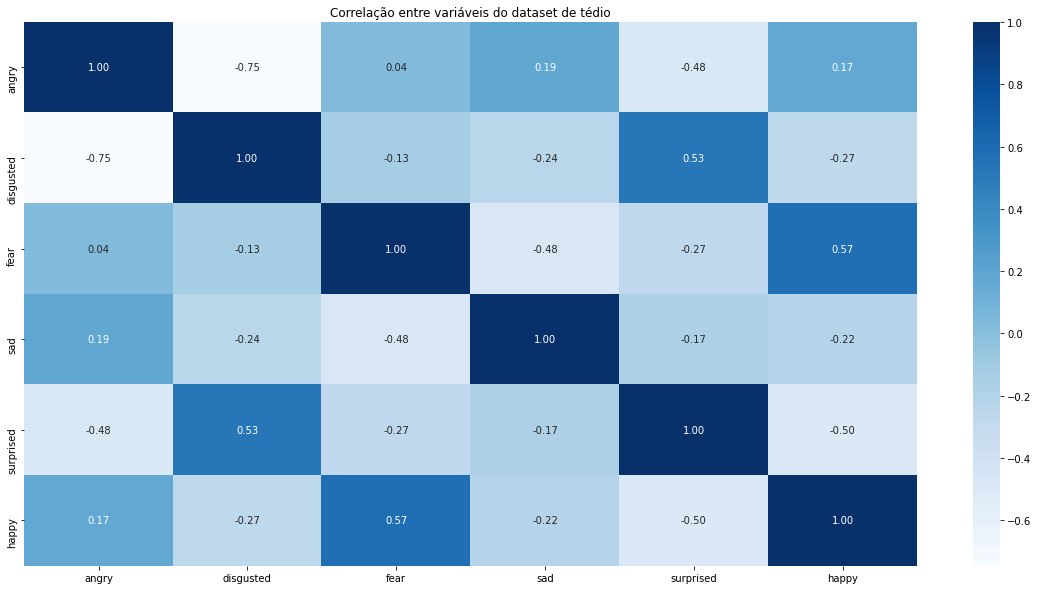

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        1027.0
disgusted     899.0
fear          862.0
sad          1063.0
surprised     869.0
happy         951.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

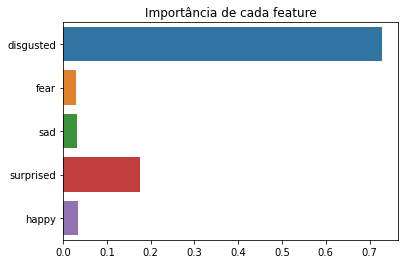

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

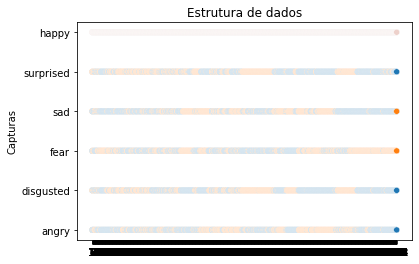

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7f19bec1b7d0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,a,d,e,f,g,h,i,n,p,r,s,t,u,y
0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,0,1,0,1,0,0,0,1,1,1,0
2,1,0,1,1,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,1,0,1,1,1,0,1,0
5,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.666667,(a)
1,0.500000,(d)
2,0.500000,(e)
3,0.500000,(r)
4,0.500000,(s)
5,0.500000,"(d, s)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.536292,(angry)
1,0.469452,(disgusted)
2,0.450131,(fear)
3,0.555091,(sad)
4,0.453786,(surprised)
5,0.496606,(happy)
6,0.250131,"(fear, angry)"
7,0.344648,"(sad, angry)"
8,0.309661,"(happy, angry)"
9,0.202089,"(sad, disgusted)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sad),(angry),0.555091,0.536292,0.344648,0.620884,1.157735,0.046956,1.223129
1,(angry),(sad),0.536292,0.555091,0.344648,0.642648,1.157735,0.046956,1.245017
2,(happy),(angry),0.496606,0.536292,0.309661,0.623554,1.162713,0.043335,1.231804
3,(surprised),(disgusted),0.453786,0.469452,0.343603,0.757192,1.612929,0.130573,2.185054
4,(disgusted),(surprised),0.469452,0.453786,0.343603,0.731924,1.612929,0.130573,2.037537
5,(happy),(fear),0.496606,0.450131,0.365535,0.736067,1.635231,0.141998,2.083370
6,(fear),(happy),0.450131,0.496606,0.365535,0.812065,1.635231,0.141998,2.678555
7,"(happy, angry)",(fear),0.309661,0.450131,0.213577,0.689713,1.532252,0.074189,1.772134
8,"(fear, angry)",(happy),0.250131,0.496606,0.213577,0.853862,1.719397,0.089361,3.444655


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 04 na base Estresse - Erro

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster04_tedio_estresse/dadosEstresseB_cluster4.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.051079,0.036602,0.178640,0.109291,0.026408,0.007276
1,0.049412,0.038128,0.180903,0.134206,0.024668,0.006485
2,0.043280,0.034743,0.157319,0.118276,0.025617,0.008780
3,0.047401,0.047937,0.177940,0.188136,0.018458,0.007008
4,0.037114,0.038165,0.165875,0.217920,0.022110,0.007881
5,0.047455,0.032584,0.176382,0.102715,0.028437,0.007403
6,0.029792,0.035054,0.127645,0.298154,0.020521,0.009871
7,0.025239,0.021166,0.124181,0.303573,0.033340,0.010110


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.05107941, 0.03660225, 0.17864019, 0.10929135, 0.02640825,
        0.007276  ],
       [0.04941168, 0.03812778, 0.18090331, 0.1342064 , 0.02466831,
        0.00648544],
       [0.04328015, 0.0347427 , 0.15731917, 0.11827625, 0.02561692,
        0.0087797 ],
       ...,
       [0.10705992, 0.08262823, 0.05939632, 0.29733634, 0.04493428,
        0.01438295],
       [0.13042198, 0.09654017, 0.0537676 , 0.25679168, 0.03354151,
        0.01410774],
       [0.15011703, 0.10062113, 0.0537851 , 0.33297793, 0.02467524,
        0.01033912]])

In [ ]:
matrix.T

array([[0.05107941, 0.04941168, 0.04328015, ..., 0.10705992, 0.13042198,
        0.15011703],
       [0.03660225, 0.03812778, 0.0347427 , ..., 0.08262823, 0.09654017,
        0.10062113],
       [0.17864019, 0.18090331, 0.15731917, ..., 0.05939632, 0.0537676 ,
        0.0537851 ],
       [0.10929135, 0.1342064 , 0.11827625, ..., 0.29733634, 0.25679168,
        0.33297793],
       [0.02640825, 0.02466831, 0.02561692, ..., 0.04493428, 0.03354151,
        0.02467524],
       [0.007276  , 0.00648544, 0.0087797 , ..., 0.01438295, 0.01410774,
        0.01033912]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

LinAlgError: ignored

In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

In [ ]:
df_results = list(df_ar)
print(len(df_results))

In [ ]:
df_results

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

## Cluter 05 na base Tédio - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster05_tedio_estresse/dadosTedioB_cluster5.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

In [ ]:
matrix.T

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

In [ ]:
df_results = list(df_ar)
print(len(df_results))

In [ ]:
df_results

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

## Cluter 05 na base Estresse - Ok

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster05_tedio_estresse/dadosEstresseB_cluster5.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

In [ ]:
matrix.T

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

In [ ]:
df_results = list(df_ar)
print(len(df_results))

In [ ]:
df_results

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

## Cluter 06 na base Tédio - Erro

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster06_tedio_estresse/dadosTedioB_cluster6.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.133181,0.105655,0.017619,0.049517,0.063069,0.147662
1,0.115251,0.102335,0.022584,0.052045,0.061150,0.156806
2,0.171331,0.209692,0.036185,0.023385,0.015688,0.084053
3,0.305050,0.386468,0.036354,0.010935,0.005387,0.047086
4,0.213888,0.262115,0.028531,0.022304,0.009951,0.083648
5,0.068175,0.075363,0.029539,0.081790,0.062008,0.200947
6,0.019753,0.021926,0.015788,0.302461,0.185307,0.489296
7,0.019953,0.021008,0.019041,0.309759,0.178498,0.469276


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.13318077, 0.10565457, 0.01761904, 0.04951662, 0.06306876,
        0.14766235],
       [0.1152514 , 0.10233481, 0.02258376, 0.05204464, 0.06115006,
        0.15680621],
       [0.17133115, 0.2096925 , 0.03618501, 0.02338532, 0.01568768,
        0.08405326],
       ...,
       [0.08495773, 0.09287702, 0.0321894 , 0.05993174, 0.0540326 ,
        0.1856282 ],
       [0.08495773, 0.09287702, 0.0321894 , 0.05993174, 0.0540326 ,
        0.1856282 ],
       [0.08495773, 0.09287702, 0.0321894 , 0.05993174, 0.0540326 ,
        0.1856282 ]])

In [ ]:
matrix.T

array([[0.13318077, 0.1152514 , 0.17133115, ..., 0.08495773, 0.08495773,
        0.08495773],
       [0.10565457, 0.10233481, 0.2096925 , ..., 0.09287702, 0.09287702,
        0.09287702],
       [0.01761904, 0.02258376, 0.03618501, ..., 0.0321894 , 0.0321894 ,
        0.0321894 ],
       [0.04951662, 0.05204464, 0.02338532, ..., 0.05993174, 0.05993174,
        0.05993174],
       [0.06306876, 0.06115006, 0.01568768, ..., 0.0540326 , 0.0540326 ,
        0.0540326 ],
       [0.14766235, 0.15680621, 0.08405326, ..., 0.1856282 , 0.1856282 ,
        0.1856282 ]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

LinAlgError: ignored

In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

In [ ]:
df_results = list(df_ar)
print(len(df_results))

In [ ]:
df_results

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

## Cluter 06 na base Estresse - Erro

### Tratando os dados

In [ ]:
arquivo = "/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster06_tedio_estresse/dadosEstresseB_cluster6.xlsx"
df = pd.read_excel(arquivo)

# deixar no dataframe somente com as linhas correspondentes ao game_id 1
df = df.drop(columns=['timestamp', 'game_name', 'uuid', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23','p24'])

filtro  = df["game_id"] == 1
df = df[filtro]
df = df.drop(columns=['game_id'])

# visualizar as 8 primeiras entradas do df
df.head(8)

,angry,disgusted,fear,sad,surprised,happy
0,0.165462,0.048677,0.021233,0.060161,0.044739,0.030824
1,0.342570,0.106005,0.016673,0.015750,0.015140,0.011404
2,0.378423,0.173507,0.013542,0.012591,0.012879,0.016554
3,0.323938,0.166190,0.013796,0.015629,0.017227,0.024779
4,0.268260,0.147060,0.015133,0.018839,0.021283,0.035772
5,0.221803,0.132734,0.016707,0.023466,0.026613,0.049302
6,0.110098,0.088123,0.015796,0.067661,0.066953,0.119680
7,0.200023,0.111169,0.007019,0.027799,0.018169,0.060311


### Ajustando valores contínuos


In [ ]:
matrix = df.to_numpy()

matrix

array([[0.16546241, 0.04867711, 0.02123305, 0.06016101, 0.04473872,
        0.03082356],
       [0.34257042, 0.10600525, 0.01667253, 0.01574995, 0.01514022,
        0.01140425],
       [0.37842325, 0.17350744, 0.01354163, 0.01259069, 0.01287869,
        0.016554  ],
       ...,
       [0.08495773, 0.09287702, 0.0321894 , 0.05993174, 0.0540326 ,
        0.1856282 ],
       [0.08495773, 0.09287702, 0.0321894 , 0.05993174, 0.0540326 ,
        0.1856282 ],
       [0.08495773, 0.09287702, 0.0321894 , 0.05993174, 0.0540326 ,
        0.1856282 ]])

In [ ]:
matrix.T

array([[0.16546241, 0.34257042, 0.37842325, ..., 0.08495773, 0.08495773,
        0.08495773],
       [0.04867711, 0.10600525, 0.17350744, ..., 0.09287702, 0.09287702,
        0.09287702],
       [0.02123305, 0.01667253, 0.01354163, ..., 0.0321894 , 0.0321894 ,
        0.0321894 ],
       [0.06016101, 0.01574995, 0.01259069, ..., 0.05993174, 0.05993174,
        0.05993174],
       [0.04473872, 0.01514022, 0.01287869, ..., 0.0540326 , 0.0540326 ,
        0.0540326 ],
       [0.03082356, 0.01140425, 0.016554  , ..., 0.1856282 , 0.1856282 ,
        0.1856282 ]])

In [ ]:
np_data = np.linalg.pinv(matrix.T)
data = pd.DataFrame(np_data, columns = ['angry', 'disgusted','fear','sad','surprised','happy'])
data

LinAlgError: ignored

In [ ]:
data[data <= 0] = 0
data[data > 0] = 1

### Correlação

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(data).transform(data, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(data, min_support = 0.2, use_colnames = True)
df_new

Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

In [ ]:
df_results = list(df_ar)
print(len(df_results))

In [ ]:
df_results

### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()